In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('owid-covid-data.csv')

In [126]:
# Esercizio 1
print("Dimensioni Righe e Colonne:", df.shape)
print()
print("Metadati:")

# Nomi delle colonne
print("Elenco colonne:")
for col in df.columns:
    print(" -", col)

# Tipo di ciascuna colonna
print()
print("Tipi di dato:")
print(df.dtypes)

# Data dell'ultimo record
print()
last = df['date'].max()
print(f"Ultima data registrata: {last}")


Dimensioni Righe e Colonne: (429435, 67)

Metadati:
Elenco colonne:
 - iso_code
 - continent
 - location
 - date
 - total_cases
 - new_cases
 - new_cases_smoothed
 - total_deaths
 - new_deaths
 - new_deaths_smoothed
 - total_cases_per_million
 - new_cases_per_million
 - new_cases_smoothed_per_million
 - total_deaths_per_million
 - new_deaths_per_million
 - new_deaths_smoothed_per_million
 - reproduction_rate
 - icu_patients
 - icu_patients_per_million
 - hosp_patients
 - hosp_patients_per_million
 - weekly_icu_admissions
 - weekly_icu_admissions_per_million
 - weekly_hosp_admissions
 - weekly_hosp_admissions_per_million
 - total_tests
 - new_tests
 - total_tests_per_thousand
 - new_tests_per_thousand
 - new_tests_smoothed
 - new_tests_smoothed_per_thousand
 - positive_rate
 - tests_per_case
 - tests_units
 - total_vaccinations
 - people_vaccinated
 - people_fully_vaccinated
 - total_boosters
 - new_vaccinations
 - new_vaccinations_smoothed
 - total_vaccinations_per_hundred
 - people_va

In [122]:
# Esercizio 2
#    a) numero di casi cumulati (ultimo valore disponibile)
#    b) percentuale rispetto al totale mondiale
df_cont = df[df['continent'].notna()]
casi_continenti = (
    df_cont
    .sort_values('date')
    .groupby('continent')['total_cases']
    .last()
)
totali_globali = casi_continenti.sum()
percentuale_cont = (cases_cont / totali_globali * 100).round(2)

print()
print("a) Casi totali fin dall'inizio per continente:")
for cont, val in cases_cont.items():
    print(f" - {cont}: {int(val):,}")

print()
print("b) % sul totale mondiale:")
for cont, val in percentuale_cont.items():
    print(f" - {cont}: {val}%")


a) Casi totali fin dall'inizio per continente:
 - Africa: 1,153,361
 - Asia: 5,309,410
 - Europe: 4,457,868
 - North America: 1,403
 - Oceania: 4
 - South America: 10,101,218

b) % sul totale mondiale:
 - Africa: 5.49%
 - Asia: 25.25%
 - Europe: 21.2%
 - North America: 0.01%
 - Oceania: 0.0%
 - South America: 48.05%


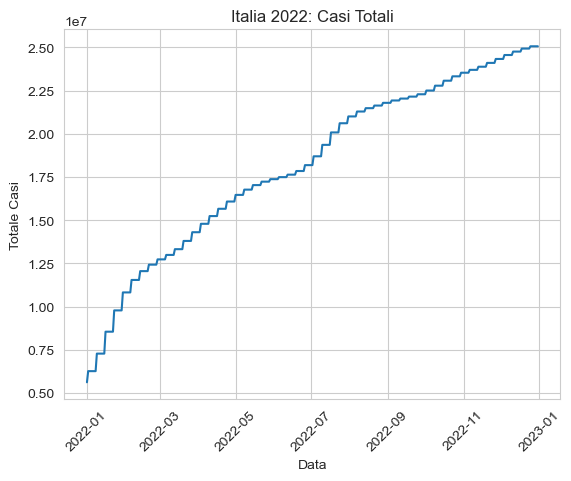

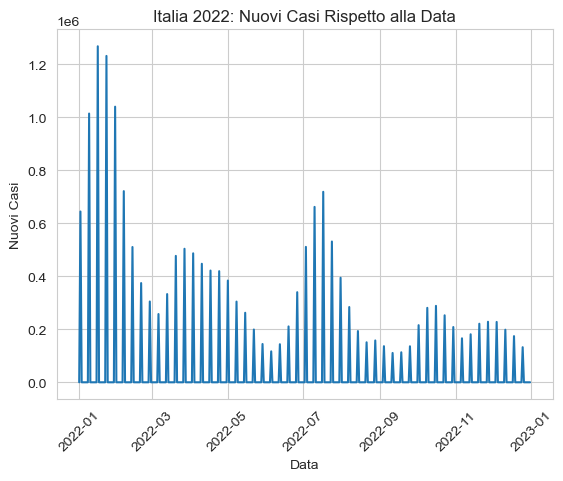

In [170]:
# Esercizio 3
dati_italia_2022 = (
    df[(df.location == 'Italy') & (df.date.dt.year == 2022)]
      .dropna(subset=['new_cases'])
      .copy())

sns.set_style("whitegrid")

# a) Evoluzione dei casi totali
sns.lineplot(
    x=dati_italia_2022.date,
    y=dati_italia_2022.total_cases
).set(
    title="Italia 2022: Casi Totali",
    xlabel="Data",
    ylabel="Totale Casi"
)
plt.xticks(rotation=45)
plt.show()

# b) Nuovi casi rispetto alla data
sns.lineplot(
    x=dati_italia_2022.date,
    y=dati_italia_2022.new_cases
).set(
    title="Italia 2022: Nuovi Casi Rispetto alla Data",
    xlabel="Data",
    ylabel="Nuovi Casi"
)
plt.xticks(rotation=45)
plt.show()


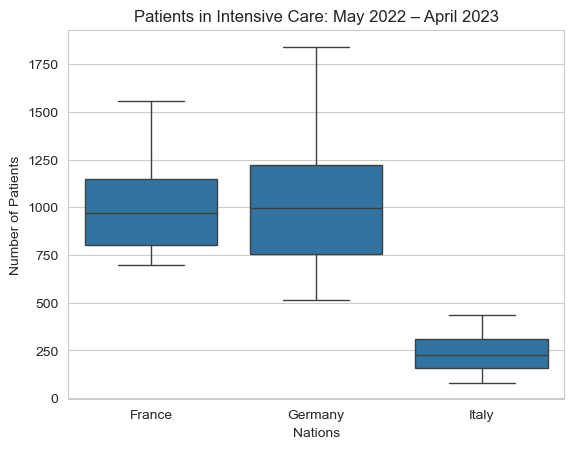

L'analisi del grafico evidenzia una marcata differenza nel numero di pazienti in terapia intensiva. 
La Germania ha registrato i valori più elevati, mentre l'Italia ha mostrato i valori più contenuti. 
La Francia si posiziona su un livello intermedio.


In [188]:
# Esercizio 4

covid_data = pd.read_csv('owid-covid-data.csv', parse_dates=['date'])
countries_to_plot = ['Italy', 'Germany', 'France']
date_start = '2022-05-01'
date_end = '2023-04-30'
date_mask = (covid_data.date >= date_start) & (covid_data.date <= date_end)
country_mask = covid_data.location.isin(countries_to_plot)
filtered_data = covid_data[date_mask & country_mask]

sns.set_style("whitegrid")
sns.boxplot(data=filtered_data, x='location', y='icu_patients')
plt.title('Patients in Intensive Care: May 2022 – April 2023')
plt.xlabel('Nations')
plt.ylabel('Number of Patients')
plt.show()

print("L'analisi del grafico evidenzia una marcata differenza nel numero di pazienti in terapia intensiva. \nLa Germania ha registrato i valori più elevati, mentre l'Italia ha mostrato i valori più contenuti. \nLa Francia si posiziona su un livello intermedio.")

Somma Pazienti Ospedalizzati 2021:
location
France     6008717.0
Germany          NaN
Italy      4419950.0
Spain      2411706.0



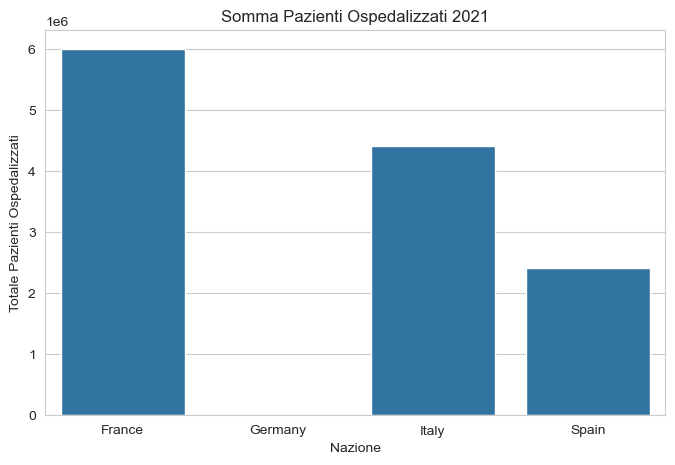

Paesi con pochi NaN si possono stimare per approssimazione, ma se tutti i valori sono NaN (es. Germany) 
non ha senso sostituirli.


In [224]:
# Esercizio 5

covid_data = pd.read_csv('owid-covid-data.csv', parse_dates=['date'])

paesi = ['Italy', 'Germany', 'France', 'Spain']
mask_anno  = covid_data.date.dt.year == 2021
mask_paesi = covid_data.location.isin(paesi)
dati_2021  = covid_data[mask_anno & mask_paesi]

# Somma dei pazienti ospedalizzati per nazione, mantenendo NaN se tutti i valori sono mancanti
somme_ospedalizzati = (
    dati_2021
    .groupby('location')['hosp_patients']
    .sum(min_count=1)
)

# a) Output numerico
print("Somma Pazienti Ospedalizzati 2021:")
print(somme_ospedalizzati.to_string())
print()

# a) Output grafico
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x=somme_ospedalizzati.index, y=somme_ospedalizzati.values)
plt.title('Somma Pazienti Ospedalizzati 2021')
plt.xlabel('Nazione')
plt.ylabel('Totale Pazienti Ospedalizzati')
plt.show()

# b) Commento sui dati nulli
print("Paesi con pochi NaN si possono stimare per approssimazione, ma se tutti i valori sono NaN (es. Germany) \nnon ha senso sostituirli.")
